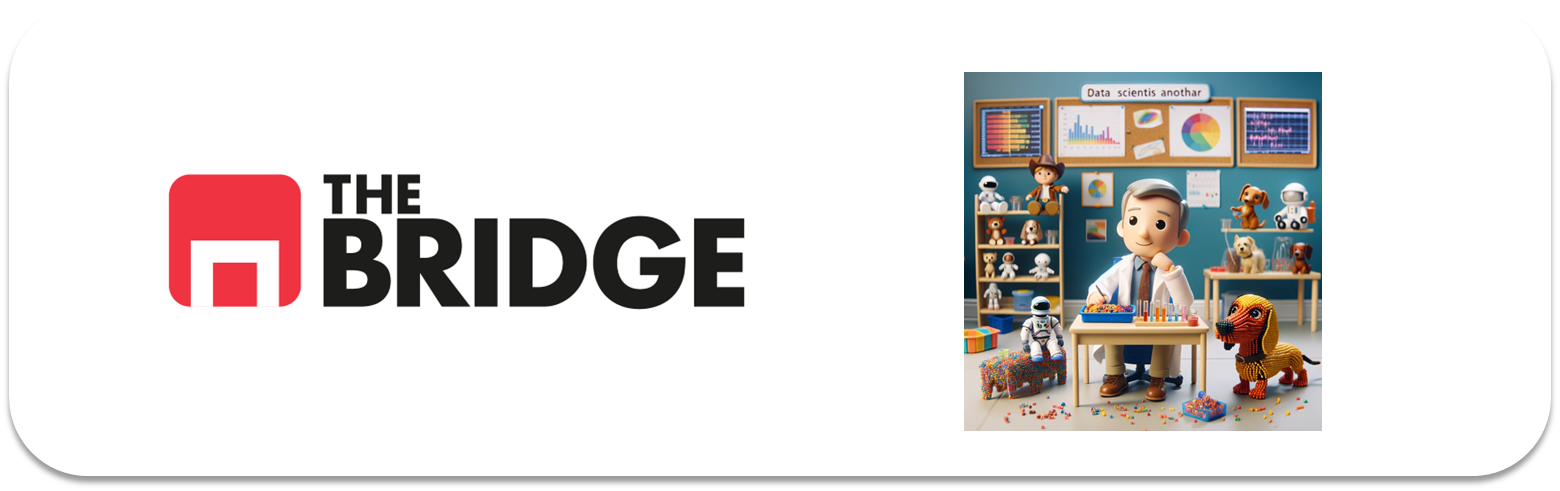

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [269]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [236]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [237]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [238]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [231]:
na_ratio = ((df_titanic.isnull().sum() / len(df_titanic))*100).sort_values(ascending = False)
print(na_ratio)



deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64


In [239]:
df_titanic_sin_nulos = df_titanic.drop('deck', axis= 1)
df_titanic_sin_nulos = df_titanic_sin_nulos.drop('parch',axis = 1)
df_titanic_sin_nulos

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [242]:
df_titanic_sin_nulos['age'].value_counts(dropna=False)


age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [243]:
df_titanic_sin_nulos['age'].unique()


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [244]:
df_titanic_sin_nulos['age'].mean()

np.float64(29.69911764705882)

In [250]:
df_titanic_sin_nulos['age'].fillna(30, inplace = True)

In [251]:
df_titanic_sin_nulos

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,30.0,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [253]:
df_titanic_sin_nulos['embarked'].value_counts(dropna= False)

embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [256]:
df_titanic_sin_nulos['embarked'].fillna('S')
df_titanic_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


In [257]:
df_titanic_sin_nulos['embark_town'].value_counts(dropna=False) 

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [259]:
df_titanic_sin_nulos['embark_town'].fillna('Southampton', inplace = True)
df_titanic_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived       | si sobrrevivieron o no |
| pclass           | pase de clase |
| sex           |   Sexo    |
| age           |   edad (retocada) |
| sibs       |   numero de familiares que viajan con la persona |
| fare          | tarifa del viaje |
| embarked      | tipo de embarque |
| class         | Clase, pero en texto |
| who           |  Hombre, Mujer o Niño |
| adult_male    | hombres adultos|
| embark_town   | Cuidad de embarque |
| alive         | Si está vivo |
| alone         |  Si viaja solo |  



In [260]:
df_titanic_sin_nulos['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [261]:
df_titanic_sin_nulos = df_titanic_sin_nulos.replace ({'Queenstown' : 'Cork'})

df_titanic_sin_nulos

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,30.0,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [278]:
df_tipificacion = pd.DataFrame([df_titanic_sin_nulos.nunique(), df_titanic_sin_nulos.nunique()/len(df_titanic_sin_nulos) * 100, df_titanic_sin_nulos.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,88,9.876543,float64
sibsp,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,category
who,3,0.3367,object
adult_male,2,0.224467,bool


In [279]:
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion


,Card,%_Card,Tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,88,9.876543,float64,Numerica Discreta
sibsp,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica Discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria




| Columna/Variable | Descripción | Tipo Variable | Importancia |
| ---------------- | ----------- |--------------- |------------ |
| survived       | si sobrevivieron o no | Binaria | 0 |
| pclass           | pase de clase | Categórica | 3 |
| sex           |   Sexo    | Binaria | 2 |
| age           |   edad (retocada) | Numérica discreta | 1 |
| sibs       |   numero de familiares que viajan con la persona | Categórica | 3 |
| fare          | tarifa del viaje | Numérica Discreta | 2 |
| embarked      | tipo de embarque | Categórica | 1 |
| class         | Clase, pero en texto | Categórica | 1 |
| who           |  Hombre, Mujer o Niño | Categórica | 1 |
| adult_male    | hombres adultos| Binaria | 2 |
| embark_town   | Cuidad de embarque | Categórica | 3 |
| alive         | Si está vivo | Binaria | 1 |
| alone         |  Si viaja solo |  Binaria | 1 |

Importancia : target/directora (0), agrupación importante (1), agrupación interesante (2), agrupación secundaria (3)

In [280]:
# voy a ver las medidas de tendencia central 

df_titanic_sin_nulos.describe().loc['mean']

survived     0.383838
pclass       2.308642
age         29.758889
sibsp        0.523008
fare        32.204208
Name: mean, dtype: float64

Nos indica que la supervivencia fue muy baja. La media de edad de los pasajeros rondaba la treintena (ojo, dato modificado, faltaban muchos), la gente aparentemente viajaba en segunda clase, la mayoria viajaba solo, y la media del precio del viaje eran 32,20.

In [281]:
# Calculamos la mediana

df_titanic_sin_nulos.describe().loc ['50%']

survived     0.0000
pclass       3.0000
age         30.0000
sibsp        0.0000
fare        14.4542
Name: 50%, dtype: float64

Viendo estos resutados y en comparación con la media, vemos que la mayoria de las personas que viajaban eran de tercera clase, no sobrevivieron apenas, viajaban solos y el precio del embarque fue bajo (todos los datos tienen relacion entre sí)

In [289]:
# Calculamos la moda en las variables categóricas que nos interesan incluyendo las binarias, a parte de las mencionadas, voy a incluir si viajaban solos o no, y el sexo

categoricas_titanic = [ 
    "sibsp",
    "survived",
    "sex",
    "embarked",
    "class",
    "who",
    "alone",
]


In [290]:
df_titanic_sin_nulos[categoricas_titanic].mode().T

,0
sibsp,0
survived,0
sex,male
embarked,S
class,Third
who,man
alone,True


De ver la moda, podemos observar que los datos de la mediana se asemejan mucho, es decir, la mayoria de la gente de tercera clase murió. Y su perfil parecía ser el de hombres que viajaban solos.

In [291]:
# Vamos a mostrar gráficas asi que voy a tirar de las funciones que nos ha dejado Jaime en las pildoras

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [292]:
# Frecuencias absolutas
for catego in categoricas_titanic:
    print(f" Para {catego}")
    print(df_titanic_sin_nulos[catego].value_counts())
    print("\n"*2)

 Para sibsp
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64



 Para survived
survived
0    549
1    342
Name: count, dtype: int64



 Para sex
sex
male      577
female    314
Name: count, dtype: int64



 Para embarked
embarked
S    646
C    168
Q     77
Name: count, dtype: int64



 Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



 Para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



 Para alone
alone
True     537
False    354
Name: count, dtype: int64





Después de observar los valores, parece que la moda tiene sentido ya que la mayoría de los viajeron eran hombres adultos de tercera clase, viajaban solos, murieron, embarcaban en Southampton.

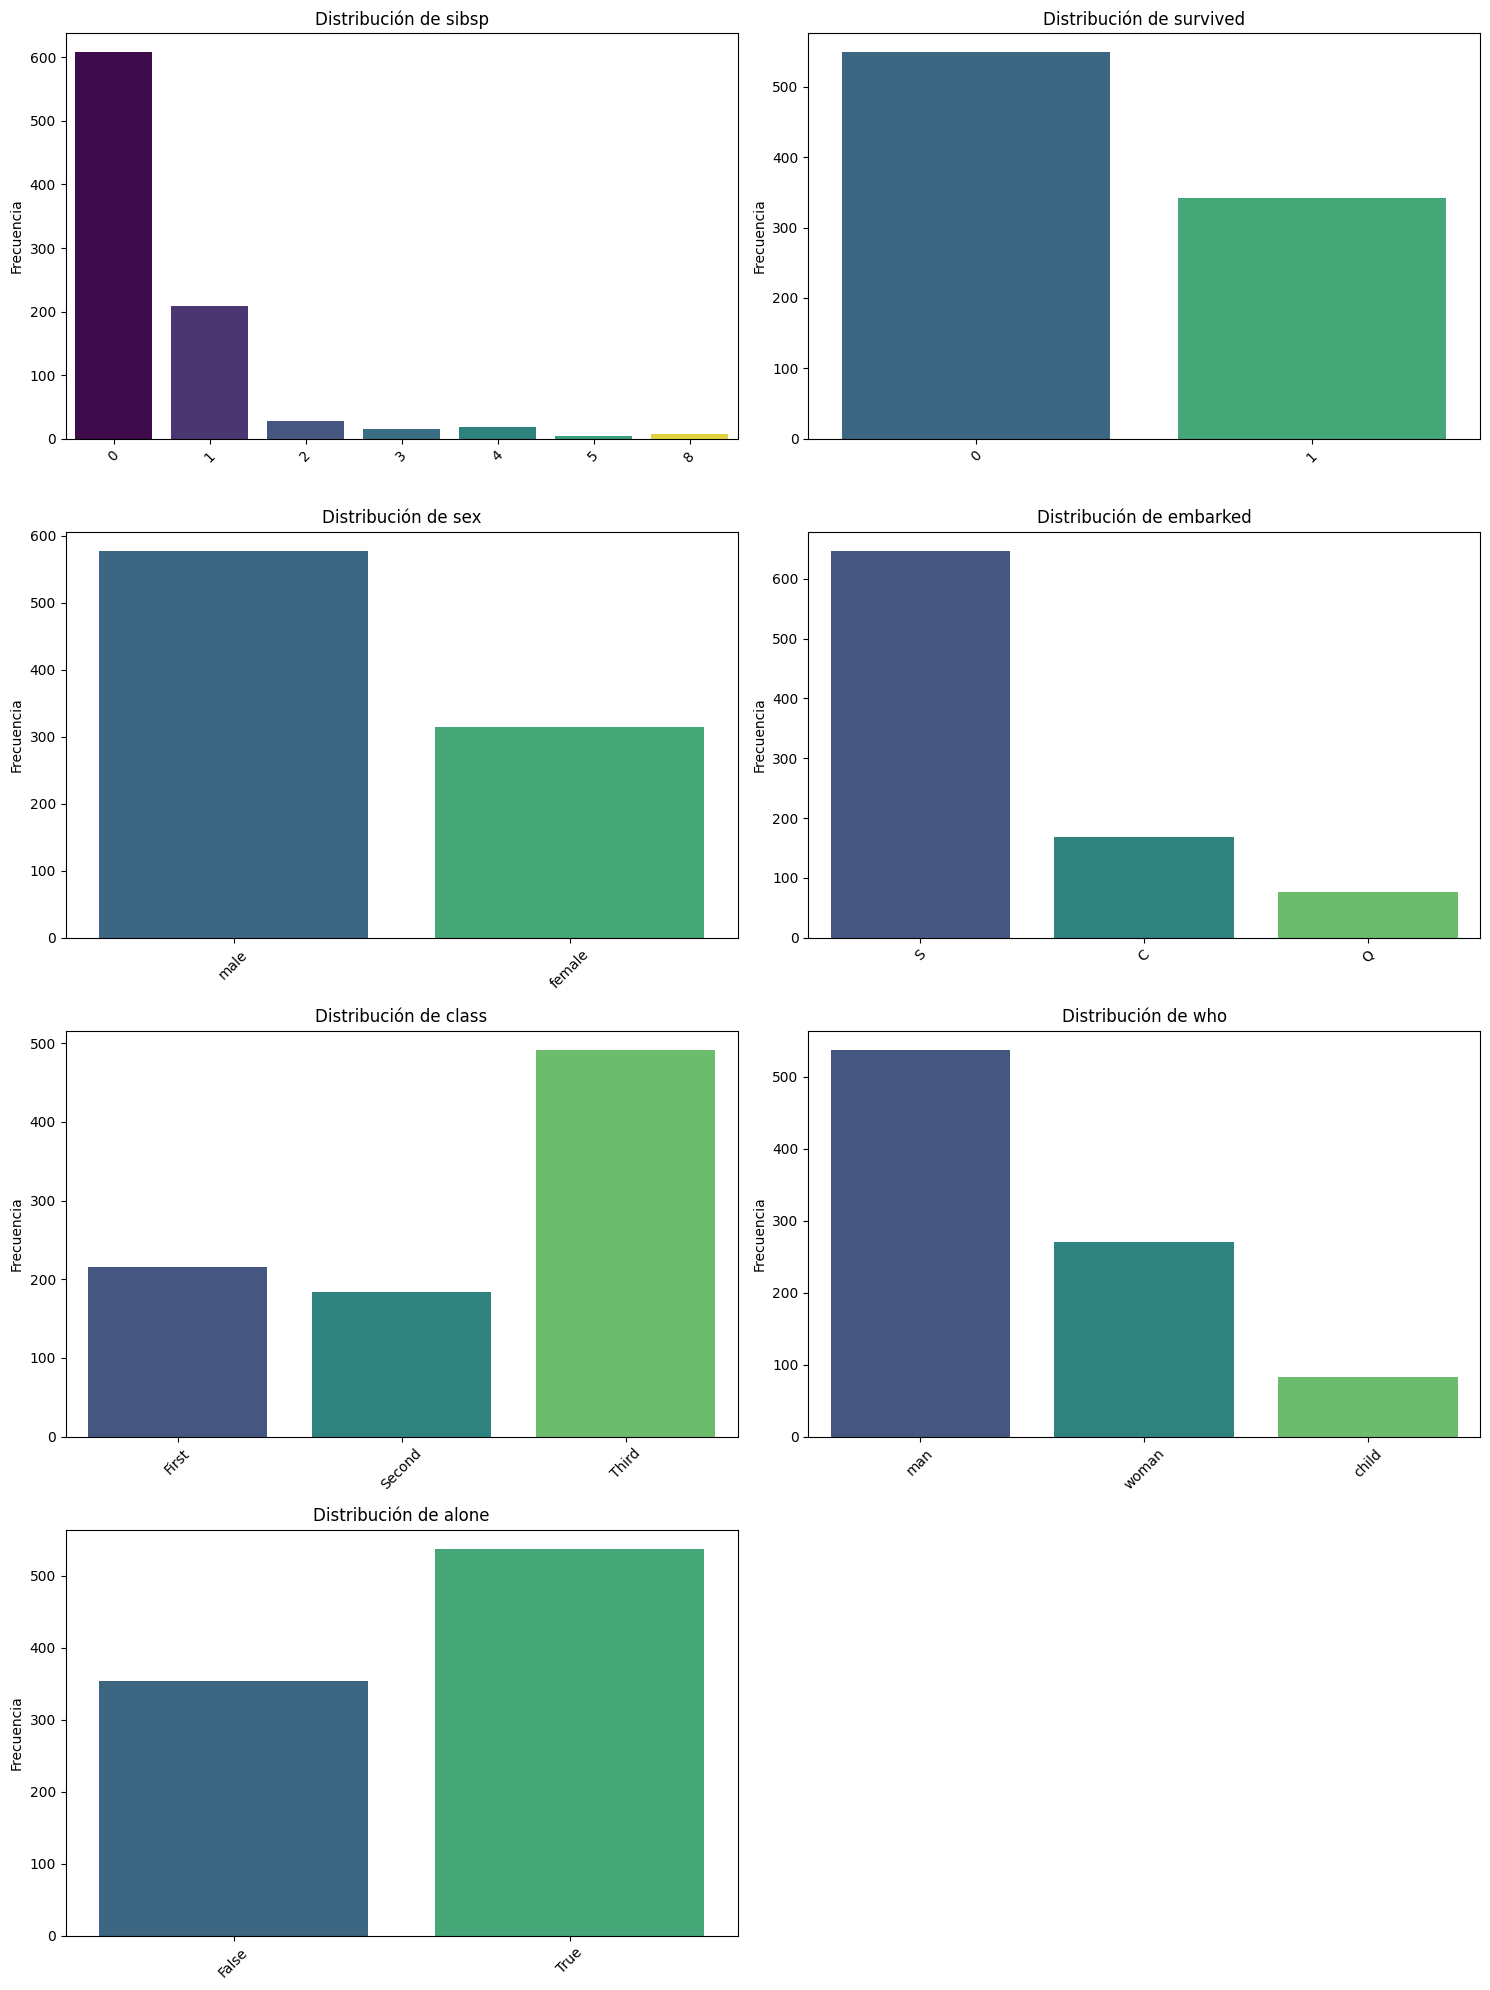

In [293]:
pinta_distribucion_categoricas(df_titanic_sin_nulos, categoricas_titanic)

In [294]:
#Frecuencias relativas
for catego in categoricas_titanic:
    print(f" Para {catego}")
    print(df_titanic_sin_nulos[catego].value_counts()/len(df_titanic_sin_nulos)*100)
    print("\n"*2)

 Para sibsp
sibsp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64



 Para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64



 Para sex
sex
male      64.758698
female    35.241302
Name: count, dtype: float64



 Para embarked
embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64



 Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



 Para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



 Para alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64





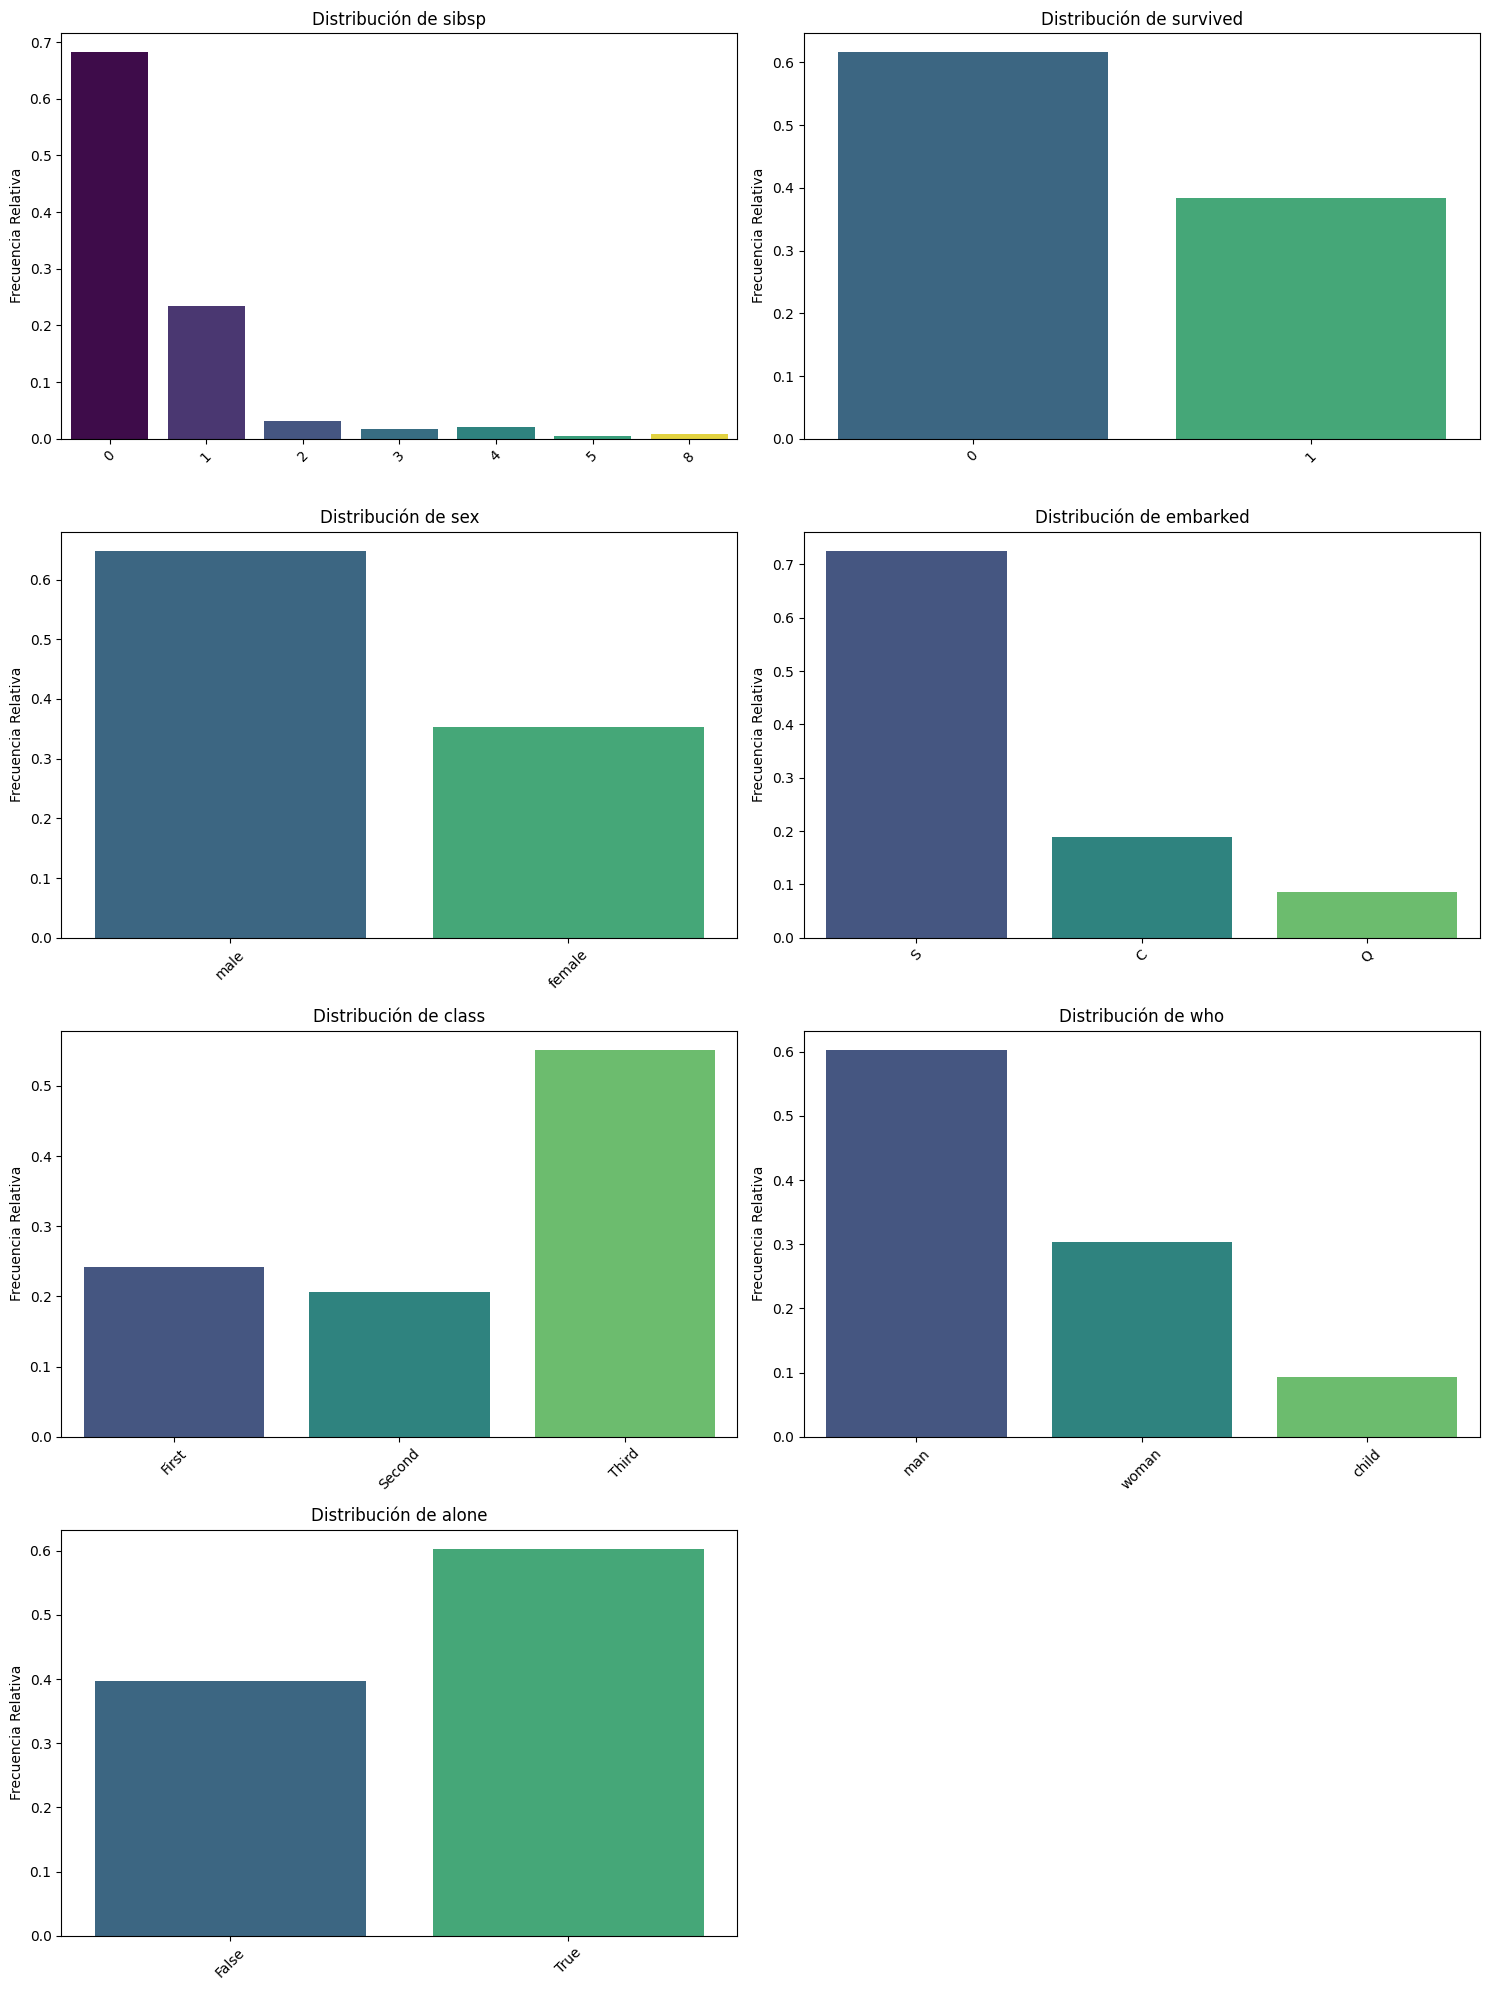

In [295]:
pinta_distribucion_categoricas(df_titanic_sin_nulos, categoricas_titanic, relativa = True)

Observando las frecuencias relativas, los datos se confirman.

### #2.2 Numéricas

In [ ]:
# Variables numéricas tendríamos edad y fare. Ojo que la edad está modificada.
# Inicialmente repito la obtencion de media, mediana y moda, aunque algunos de ellos ya los haya calculado con anterioridad.abs

# voy a ver las medidas de tendencia central 

df_titanic_sin_nulos.describe().loc['mean']

survived     0.383838
pclass       2.308642
age         29.758889
sibsp        0.523008
fare        32.204208
Name: mean, dtype: float64

In [305]:
# Calculamos la mediana

df_titanic_sin_nulos.describe().loc ['50%']

survived     0.0000
pclass       3.0000
age         30.0000
sibsp        0.0000
fare        14.4542
Name: 50%, dtype: float64

In [309]:
# Calculamos la moda en las variables numéricas que nos interesan 

numéricas_titanic = [ 
    "age",
    "fare",
]

df_titanic_sin_nulos[numéricas_titanic].mode().T

,0
age,30.00
fare,8.05


Después de realizar estas tres operaciones, en relación a la variable edad, las tres dan valores muy parecidos (recordemos que he completado los NaN con la media, y eran bastantes los que faltaban). En cuanto al precio del pase hay mucha variación entre las tres. Voy a ver cual es el valor máximo y el mínimo que se pagaron.

In [312]:
df_titanic_sin_nulos.describe().loc["max"]

survived      1.0000
pclass        3.0000
age          80.0000
sibsp         8.0000
fare        512.3292
Name: max, dtype: float64

In [313]:
df_titanic_sin_nulos.describe().loc["min"]

survived    0.00
pclass      1.00
age         0.42
sibsp       0.00
fare        0.00
Name: min, dtype: float64

Pues si que hay valores totalmente dispersos, esto si que merece un estudio.

In [314]:
# Frecuencias absolutas
for catego in numéricas_titanic:
    print(f" Para {catego}")
    print(df_titanic_sin_nulos[catego].value_counts())
    print("\n"*2)

 Para age
age
30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 88, dtype: int64



 Para fare
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64





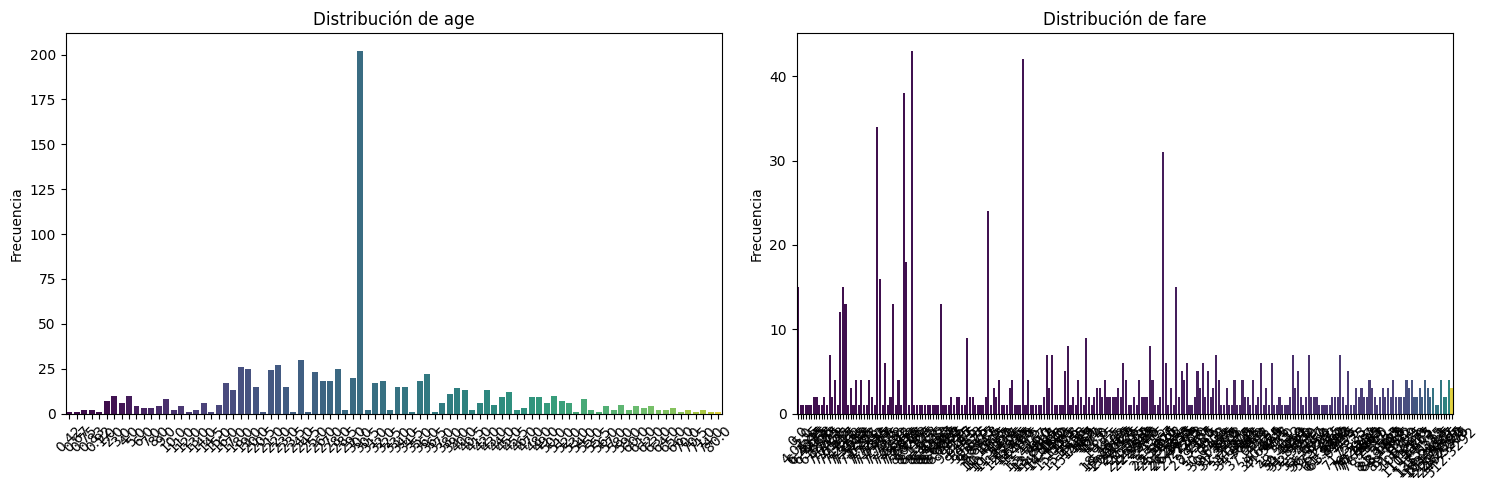

In [315]:
#uso la misma funcion para pintar tantoo numericas como categoricas
pinta_distribucion_categoricas(df_titanic_sin_nulos, numéricas_titanic)

No me sirven de mucho, ya que en la edad es obvio que l que destaca es 30 años, pero por lo que veo, el grueso de los viajeros era incluso más joven, por lo que igual en lugar de haber sustituido por la media los nulos, deberia haberlos sustituido por la mediana o la moda.
En relación al importe del pase hay diferentes picos. debo de buscar más información

In [316]:
# Voy a intentarlo con las frecuencias relativas
for catego in numéricas_titanic:
    print(f" Para {catego}")
    print(df_titanic_sin_nulos[catego].value_counts()/len(df_titanic_sin_nulos)*100)
    print("\n"*2)

 Para age
age
30.00    22.671156
24.00     3.367003
22.00     3.030303
18.00     2.918070
28.00     2.805836
           ...    
24.50     0.112233
0.67      0.112233
0.42      0.112233
34.50     0.112233
74.00     0.112233
Name: count, Length: 88, dtype: float64



 Para fare
fare
8.0500     4.826038
13.0000    4.713805
7.8958     4.264871
7.7500     3.815937
26.0000    3.479237
             ...   
13.8583    0.112233
50.4958    0.112233
5.0000     0.112233
9.8458     0.112233
10.5167    0.112233
Name: count, Length: 248, dtype: float64





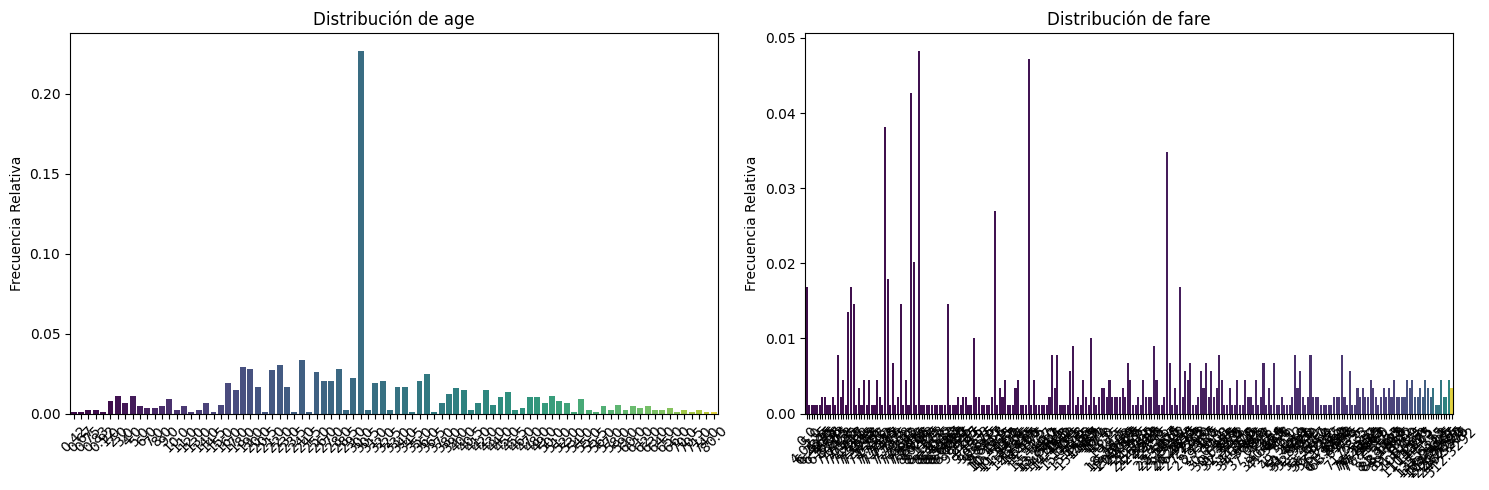

In [317]:
pinta_distribucion_categoricas(df_titanic_sin_nulos, numéricas_titanic, relativa = True)

Viendo que ni  las freciencias relativas ni absolutas tienen mucho sentido, voy a probar con los percentiles y quartiles

In [318]:
#Voy a  revisar los percentiles y quartiles de la supervivencia, ya que me parece el dato principal, como antes, tiro de las funciones de Jaime

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [328]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [320]:
# Voy a calcular percentiles de la edad y de la tarifa del billete

print(df_titanic_sin_nulos["age"].quantile(0.5),
    df_titanic_sin_nulos["age"].quantile(0.9), 
    df_titanic_sin_nulos["age"].quantile(0.95),
     df_titanic_sin_nulos["age"].max())

30.0 47.0 54.0 80.0


In [321]:
print(df_titanic_sin_nulos["fare"].quantile(0.5),
    df_titanic_sin_nulos["fare"].quantile(0.9), 
    df_titanic_sin_nulos["fare"].quantile(0.95),
     df_titanic_sin_nulos["fare"].max())

14.4542 77.9583 112.07915 512.3292


In [322]:
# Como no me quedan muy claros los percentiles, voy a aplicar el IQR y luego lo pintaré 
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [323]:
get_IQR(df_titanic_sin_nulos,"age")

np.float64(13.0)

In [324]:
get_IQR(df_titanic_sin_nulos,"fare")

np.float64(23.0896)

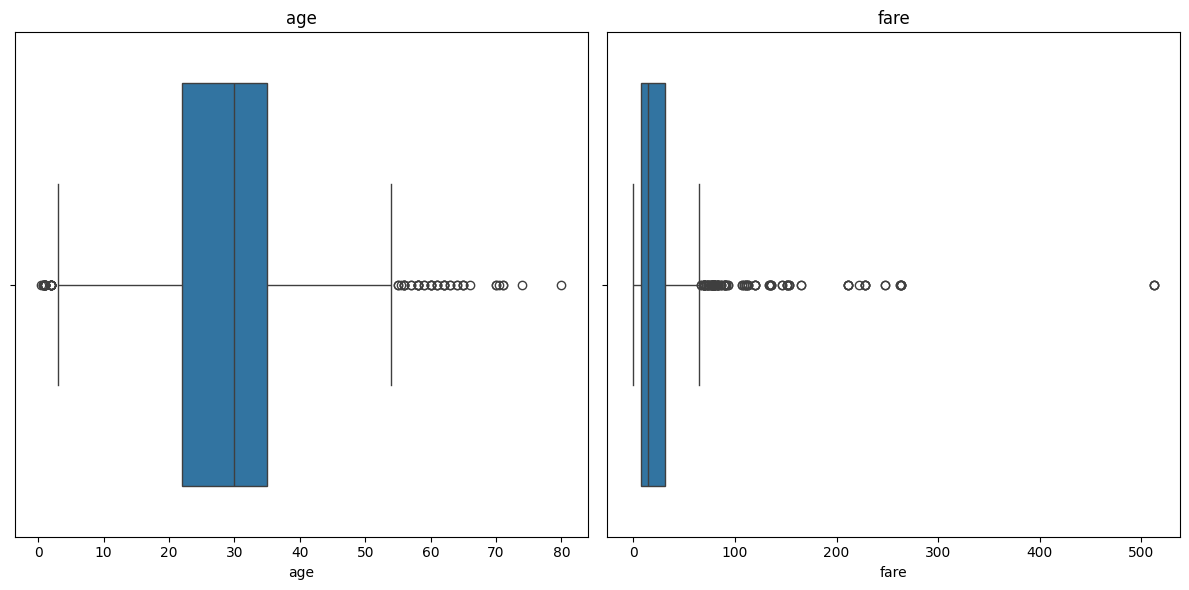

In [325]:
plot_multiple_boxplots(df_titanic_sin_nulos, numéricas_titanic)

Los datos que arroja la edad nos indican que las personas que viajaban en el titanic oscilaban en su mayoría entree los 20 y los 35 años. Hay varios valores que se salen, que corresponden a simple vista con bebes y gente mayor de 55 años. En cuanto a estos últimos puede que fuera gente de clase alta. Ya que si se compara con los billetes los valores que se salen mucho de la caja corresponden a valores altos, incluso hay uno excesivamente alto que se sale por completo. Es posible que ese valor no esté bien y sea erróneo. En cuanto a los billetes, parece que los valores se concentran entre el cero y algo menos de 50.

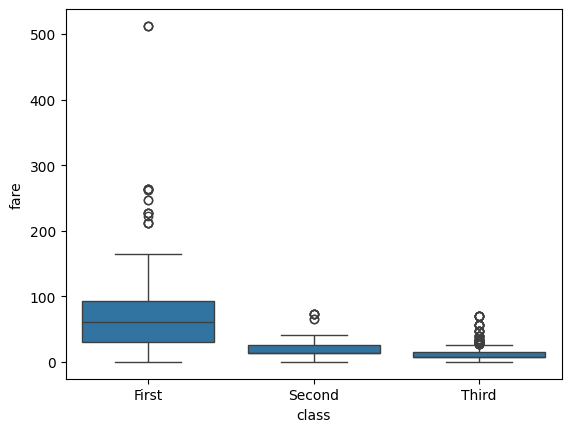

In [330]:
# Voy a probar agrupando ambos parámetros
plot_boxplot_grouped(df_titanic_sin_nulos, "fare", "class")

Al hacer esta comparación veo que el alto de tarifa se sigue yendo, y que dentro de la tercera clase, hubo gente que pagó mucho por el billete, al igual que en primera clase.


In [332]:
# Voy a ver las medidas de dispersión a ver si logramos sacar alguna otra conclusión

#Empezamos por la varianza y la dispersion estandar

df_titanic_sin_nulos.describe().loc[["std", "mean"]].T

,std,mean
survived,0.486592,0.383838
pclass,0.836071,2.308642
age,13.002570,29.758889
sibsp,1.102743,0.523008
fare,49.693429,32.204208


In [333]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [334]:
variabilidad(df_titanic_sin_nulos)

,std,mean,CV
survived,0.486592,0.383838,1.267701
pclass,0.836071,2.308642,0.362149
age,13.002570,29.758889,0.436931
sibsp,1.102743,0.523008,2.108464
fare,49.693429,32.204208,1.543073


Según los valores obtenidos para edad, la variabilidad es mayor del 30% por lo que indica que hay mucha varibilidad y para fare también.

vamos a ver la dispersion de los datos para eso voy a tirar de gráficas

In [336]:

def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()




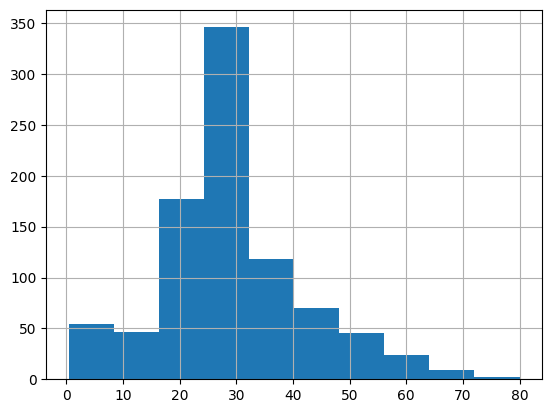

In [337]:
df_titanic_sin_nulos["age"].hist();

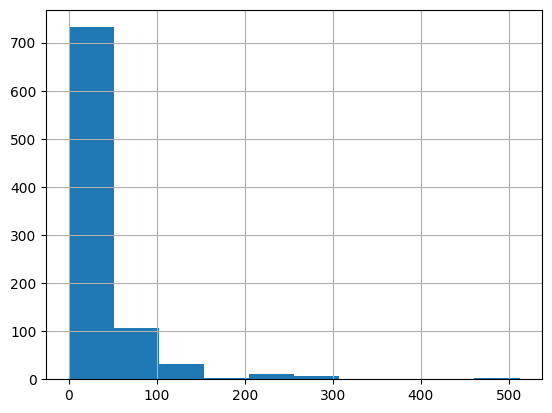

In [338]:
df_titanic_sin_nulos["fare"].hist();

Al ver ambos histogramas observo que la edad de los viajeros se concentra entre los 18 y los 35-40 años. En el caso de las tarifas, se concentran entre 0 y 50.

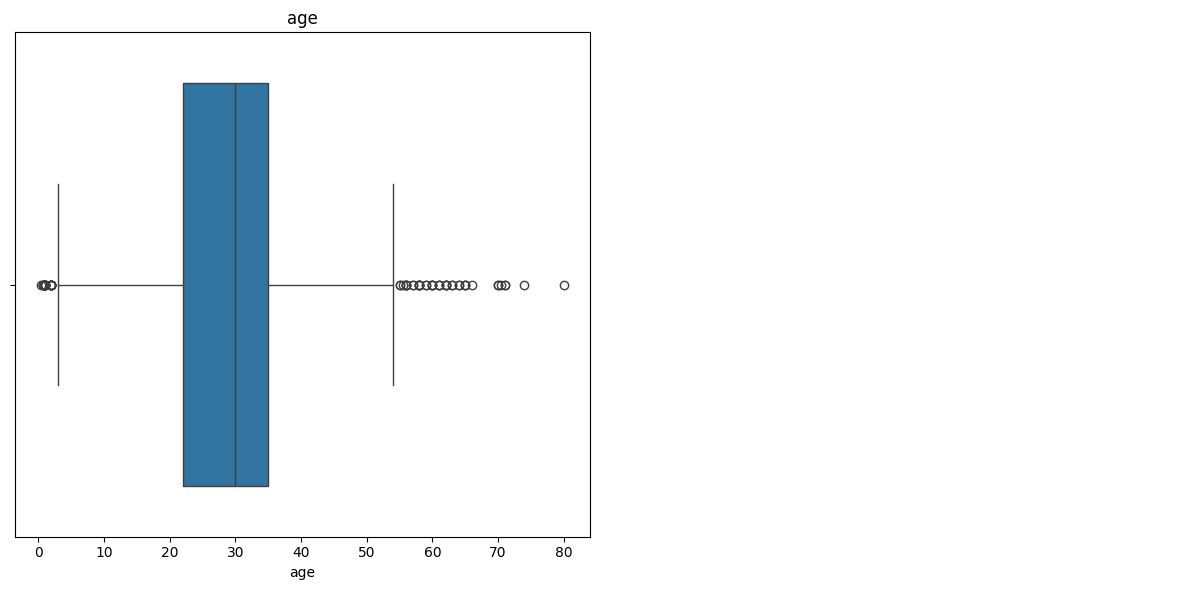

In [339]:
plot_multiple_boxplots(df_titanic_sin_nulos, ["age"])

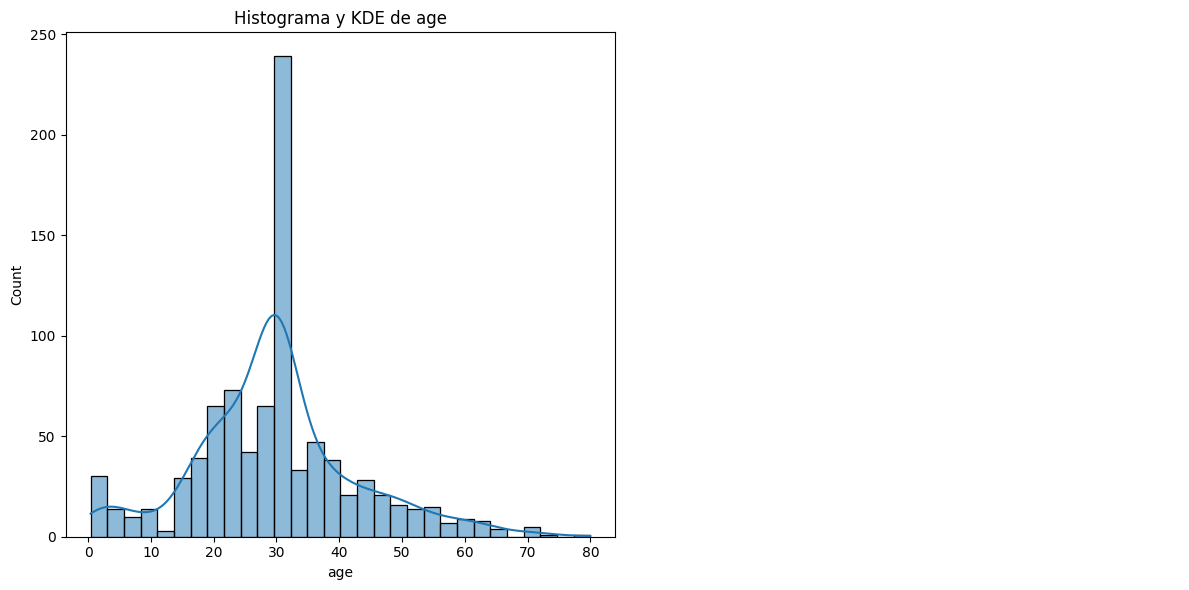

In [340]:
plot_histo_den(df_titanic_sin_nulos,["age"])

Aparentemente se parece o asemeja a una campana de gauss

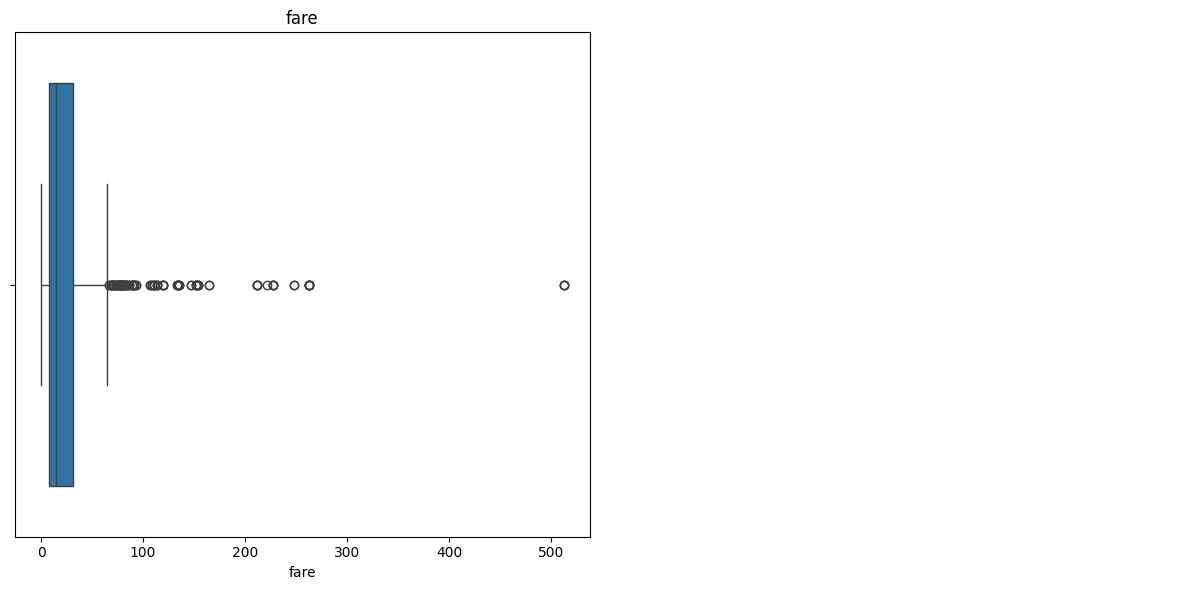

In [341]:
plot_multiple_boxplots(df_titanic_sin_nulos, ["fare"])

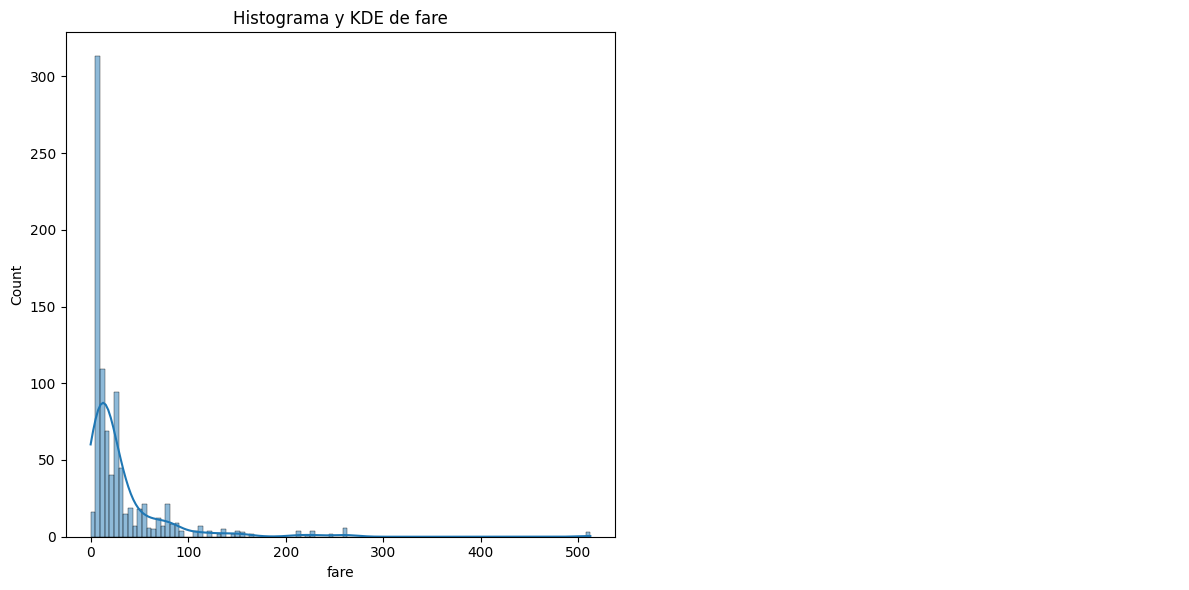

In [342]:
plot_histo_den(df_titanic_sin_nulos,["fare"])

En este caso su distribución se parece más a una curva logarítmica


En el caso de fare, creo que voy a eliminar o corregir el valor del outliner que se va muchísimo, creo que es un error de trascripcion y probablemente sea un orden de magnitud menor y voy a volver a realizar los tratamiento sde datos.

In [352]:
df_titanic_sin_nulos["fare"].sort_values()

815      0.0000
806      0.0000
413      0.0000
481      0.0000
302      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
679    512.3292
258    512.3292
Name: fare, Length: 891, dtype: float64

Después de ver esto, creo que hay 3 personas que pagaron el mismo importe, por lo que no debe ser un error.

Conclusiones generales:

Parece que la mayoría de los fallecidos en el Titanic, eran hombres jóvenes, que viajaban solos. Además estas personas viajaban en tercera clase, la mayoría pagaron tarifas de embarque bajas y se subieron en Southampton. 